# CHEM361 - Homework0 Solutions

In [ ]:
!pip install pandas matplotlib rdkit scikit-learn wget

In [2]:
!python -m wget https://raw.githubusercontent.com/deepchem/deepchem/master/datasets/delaney-processed.csv


Saved under delaney-processed.csv


## Q1

### Q1.1

Calculate the total number of chemical compounds present in the dataset.

In [3]:
import pandas as pd

DELANEY_FILE = "delaney-processed.csv"
df = pd.read_csv(DELANEY_FILE)
print(f"Number of molecules in the dataset: {df.shape[0]}")

Number of molecules in the dataset: 1128


In [4]:
df.head(5)

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


### Q1.2

Provide the minimum and maximum molecular weights of chemical compounds in the dataset.

In [5]:
import numpy as np
molecular_weight = df.iloc[:]["Molecular Weight"].values
print("Min MW:", np.min(molecular_weight))
print("Max MW:", np.max(molecular_weight))

Min MW: 16.043
Max MW: 780.9490000000001


### Q1.3

Calculate the number of chemical compounds with at least two rings in the dataset

In [6]:
num_rings = df.iloc[:]["Number of Rings"].values
mask = num_rings >= 2
new_df = df[mask]

# print to check molecules with at least two rings are filtered
new_df.head(5)

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
5,benzothiazole,-2.733,2,135.191,0,2,0,12.89,-1.50,c2ccc1scnc1c2
6,"2,2,4,6,6'-PCB",-6.545,1,326.437,0,2,1,0.00,-7.32,Clc1cc(Cl)c(c(Cl)c1)c2c(Cl)cccc2Cl


In [7]:
print("Number of chemical compounds with at least two rings:", new_df.shape[0])

Number of chemical compounds with at least two rings: 425


### Q1.4

Select any chemical compound with at least two rings and provide its Compound ID along with its SMILES string.

In [8]:
# select any two from Q1.4
# I will select the first two
two_rows_df = new_df.iloc[:2]
two_rows_df

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2


In [9]:
# print Compound ID and SMILES
for idx, row in two_rows_df.iterrows():
    print("Compound ID:", row["Compound ID"])
    print("SMILES:", row["smiles"])

Compound ID: Amigdalin
SMILES: OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O 
Compound ID: Fenfuram
SMILES: Cc1occc1C(=O)Nc2ccccc2


### Q1.5

Visualize your selected chemical compound using RDkit package

c:\Users\24153\anaconda3\envs\chem361\lib\site-packages\rdkit\Chem\PandasTools.py:379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles,mol
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2,

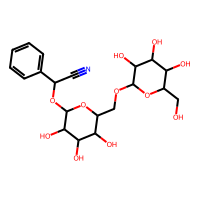
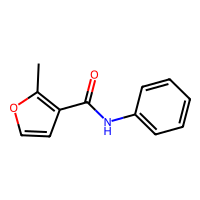

In [10]:
from rdkit.Chem import PandasTools

# get molecule from smiles
PandasTools.AddMoleculeColumnToFrame(two_rows_df, "smiles", "mol")
two_rows_df

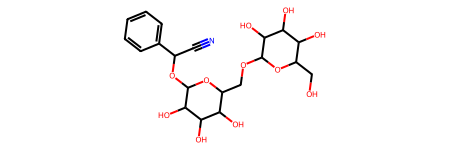

In [11]:
# Just in case the above cell didn't show image, 
# try plot the two molecules one-by-one.
# We will learn how to plot multiple mol images at once later in the course

# plot the first molecule
two_rows_df.iloc[0, -1]

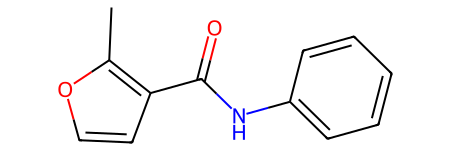

In [12]:
# plot the second molecule
two_rows_df.iloc[1, -1]

## Q2

### Q2.1

1. 70:30 train-test split
2. fit a linear regression model using "Molecular Weight"
3. Provide the slope and intercept of the fitted linear regression model

In [13]:
# get data we need
log_solubility = df.iloc[:]["ESOL predicted log solubility in mols per litre"].values

# prepare X and y
X = molecular_weight.reshape(-1,1)
y = log_solubility

In [14]:
from sklearn.model_selection import train_test_split

# do 70:30 train:test split
test_size = int(len(X)*0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

In [15]:
from sklearn.linear_model import LinearRegression

# fit the model using training data
regressor = LinearRegression().fit(X_train, y_train)

# print slope and intercept
print("Slope:", regressor.coef_)
print("Intercept:", regressor.intercept_)

Slope: [-0.01089703]
Intercept: -0.7664045143017582


### Q2.2

Report the mean squared error (MSE) for both the training and test sets.

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_train = regressor.predict(X_train)
print(f"MSE of training: {mean_squared_error(y_train, y_pred_train):.2f}")

y_pred_test = regressor.predict(X_test)
print(f"MSE of test: {mean_squared_error(y_test, y_pred_test):.2f}")

MSE of training: 1.52
MSE of test: 1.52


In [17]:
print(f"Coefficient of determination on training data: {r2_score(y_train, y_pred_train):.2f}")
print(f"Coefficient of determination on test data: {r2_score(y_test, y_pred_test):.2f}")

Coefficient of determination on training data: 0.45
Coefficient of determination on test data: 0.49


### Q 2.3

Visualize the distribution of chemical compounds in the molecular weight vs. log solubility space for both the training and test sets,  and overlay the fitted linear regression line on the plots.

Text(0.5, 1.0, 'Test set')

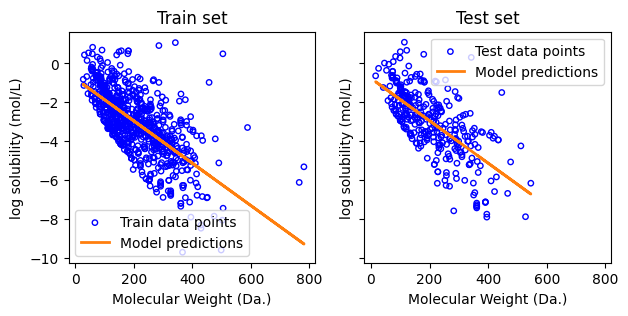

In [18]:
from matplotlib import pyplot as plt

f, ax = plt.subplots(1,2,figsize=(7,3), sharex=True, sharey=True)

ax[0].scatter(X_train,y_train,s=15, marker='o', facecolors='none', edgecolor="blue", label="Train data points")
ax[0].plot(
    X_train,
    regressor.predict(X_train),
    linewidth=2,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set_xlabel("Molecular Weight (Da.)")
ax[0].set_ylabel("log solubility (mol/L)")
ax[0].legend()
ax[0].set_title('Train set')

ax[1].scatter(X_test,y_test,s=15, marker='o', facecolors='none', edgecolor="blue", label="Test data points")
ax[1].plot(
    X_test,
    regressor.predict(X_test),
    linewidth=2,
    color="tab:orange",
    label="Model predictions",
)
ax[1].set_xlabel("Molecular Weight (Da.)")
ax[1].set_ylabel("log solubility (mol/L)")
ax[1].legend()
ax[1].set_title('Test set')

### Q2.4

Fit linear regression model using the property "Polar Surface Area" 

In [19]:
# copy the code and change the column to pick
polar_surface_area = df.iloc[:]["Polar Surface Area"].values

# prepare X and y
X = polar_surface_area.reshape(-1,1)
y = log_solubility

In [20]:
# split data
test_size = int(len(X)*0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

In [21]:
# fit the model
regressor = LinearRegression().fit(X_train, y_train)

# print slope and intercept
print("Slope:", regressor.coef_)
print("Intercept:", regressor.intercept_)

Slope: [0.00910397]
Intercept: -3.305001759223527


In [22]:
# plot mse of training and test

y_pred_train = regressor.predict(X_train)
print(f"MSE of training: {mean_squared_error(y_train, y_pred_train):.2f}")

y_pred_test = regressor.predict(X_test)
print(f"MSE of test: {mean_squared_error(y_test, y_pred_test):.2f}")

MSE of training: 2.67
MSE of test: 2.87


In [23]:
print(f"Coefficient of determination on training data: {r2_score(y_train, y_pred_train):.2f}")
print(f"Coefficient of determination on test data: {r2_score(y_test, y_pred_test):.2f}")

Coefficient of determination on training data: 0.04
Coefficient of determination on test data: 0.03


Text(0.5, 1.0, 'Test set')

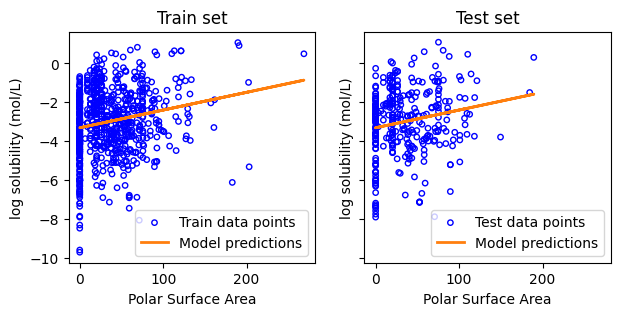

In [24]:
f, ax = plt.subplots(1,2,figsize=(7,3), sharex=True, sharey=True)

ax[0].scatter(X_train,y_train,s=15, marker='o', facecolors='none', edgecolor="blue", label="Train data points")
ax[0].plot(
    X_train,
    regressor.predict(X_train),
    linewidth=2,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set_xlabel("Polar Surface Area") # change x labels
ax[0].set_ylabel("log solubility (mol/L)")
ax[0].legend()
ax[0].set_title('Train set')

ax[1].scatter(X_test,y_test,s=15, marker='o', facecolors='none', edgecolor="blue", label="Test data points")
ax[1].plot(
    X_test,
    regressor.predict(X_test),
    linewidth=2,
    color="tab:orange",
    label="Model predictions",
)
ax[1].set_xlabel("Polar Surface Area") # change x labels
ax[1].set_ylabel("log solubility (mol/L)")
ax[1].legend()
ax[1].set_title('Test set')